Chapter 15

# 估算积分
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用蒙特卡罗方法估计给定函数 $f(x) = \frac{x \sin(x)}{2} + 8$ 在区间 $[2, 10]$ 上的积分面积。其步骤如下：

1. **定义函数**：首先定义 $f(x)$，表示为 $f(x) = \frac{x \sin(x)}{2} + 8$。

2. **找到函数在区间 $[2, 10]$ 上的最大值**：计算 $f(x)$ 在区间 $[2, 10]$ 上的最大值 $\text{fmax}$，为生成随机点提供上界。

3. **生成随机样本**：
   - 在 $x$ 轴的区间 $[2, 10]$ 上生成 $2000$ 个随机样本 $x_{\text{rand}}$。
   - 在 $y$ 轴的区间 $[0, \text{fmax}]$ 上生成 $2000$ 个随机样本 $y_{\text{rand}}$。

4. **判断样本点是否在函数曲线下方**：通过判断条件 $y_{\text{rand}} < f(x_{\text{rand}})$ 将样本分为位于函数曲线下方（蓝色点）和上方（红色点）的两类。

5. **计算面积估计**：蒙特卡罗方法用于估计面积：
   $$
   \text{估计面积} = \frac{\text{曲线下方的点数}}{\text{总点数}} \times (\text{fmax} \times (x_2 - x_1))
   $$
   其中 $\frac{\text{曲线下方的点数}}{\text{总点数}}$ 表示随机点落在函数下方的比例，乘以矩形区域的面积 $\text{fmax} \times (x_2 - x_1)$ 即得到估计的积分面积。

6. **数值积分验证**：通过 `scipy.integrate.quad` 计算 $f(x)$ 在 $[2, 10]$ 区间的精确积分值，用以对比蒙特卡罗估计的准确性。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 定义积分区间和采样数量

In [2]:
num = 2000  # 样本数量
x1 = 2  # 积分下限
x2 = 10  # 积分上限

In [3]:
# 定义函数 f(x)
def f(x):
    return x * np.sin(x) / 2 + 8

In [4]:
# 生成 x 和 y 数据
x = np.arange(x1, x2, 0.01)  # x 坐标范围
y = f(x)  # 计算 f(x) 的 y 值
fmax = np.max(y)  # 获取 f(x) 的最大值

In [5]:
# 生成随机样本点
x_rand = x1 + (x2 - x1) * np.random.random(num)  # 随机生成 x 坐标
y_rand = np.random.random(num) * fmax  # 随机生成 y 坐标

In [6]:
# 找出位于曲线下方和上方的点
ind_below = np.where(y_rand < f(x_rand))  # 位于曲线下方的点
ind_above = np.where(y_rand >= f(x_rand))  # 位于曲线上方的点

## 绘图显示

(0.0, 12.0)

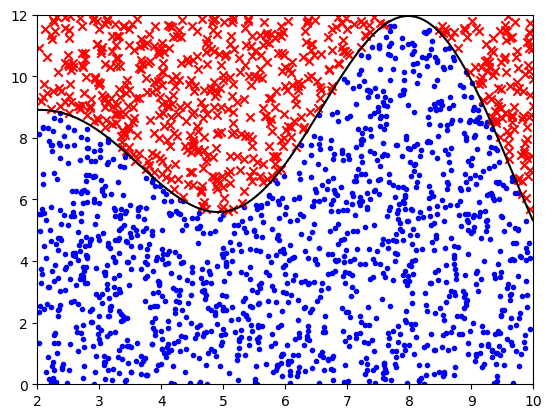

In [7]:
fig, ax = plt.subplots()

plt.scatter(x_rand[ind_below], y_rand[ind_below], color="b", marker='.')  # 曲线下方点
plt.scatter(x_rand[ind_above], y_rand[ind_above], color="r", marker='x')  # 曲线上方点
plt.plot(x, y, color="k")  # 绘制函数曲线

plt.xlim(2, 10)  # 设置 x 轴范围
plt.ylim(0, 12)  # 设置 y 轴范围

In [8]:
# 估算面积
estimated_area = np.sum(y_rand < f(x_rand)) / num * fmax * (x2 - x1)
print(estimated_area)  # 输出估算面积

66.87114940584232


In [9]:
# 使用数值积分验证估算
from scipy.integrate import quad
integral = quad(f, x1, x2)
print(integral[0])  # 输出数值积分面积

67.0525515399776
